# COURSE: A deep understanding of deep learning
## SECTION: ANNs
### LECTURE: ANN for regression
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/dudl/?couponCode=202208

In [2]:
# import libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

Object `np.ramdom.uniform` not found.


In [15]:
m = np.random.uniform(-2,2) # A single value
m_list = np.random.uniform(-2,2,21)
m
m_list

array([-0.82298803, -0.01446497,  0.07475641,  0.63446918, -1.89067651,
        1.24069072,  0.19895034, -1.47391978,  1.51921886,  0.12203477,
        0.84144226,  1.85996685, -0.02112513,  1.64676265,  1.46782616,
        1.57481353,  0.05826961,  1.50542885, -1.32406956, -0.15758599,
       -1.5008783 ])

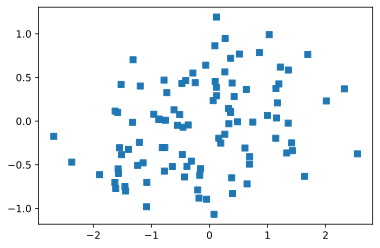

In [16]:
# create data
N = 100
x = torch.randn(N,1)
y = m * x + torch.randn(N,1)/2

# and plot
plt.plot(x,y,'s')
plt.show()

In [3]:
torch.rand??

In [ ]:
# build model
ANNreg = nn.Sequential(
    nn.Linear(1,1),  # input layer
    nn.ReLU(),       # activation function
    nn.Linear(1,1)   # output layer
    )

ANNreg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
# learning rate
learningRate = .05

# loss function
lossfun = nn.MSELoss()

# optimizer (the flavor of gradient descent to implement)
optimizer = torch.optim.SGD(ANNreg.parameters(),lr=learningRate)

In [ ]:
# train the model
numepochs = 500
losses = torch.zeros(numepochs)


## Train the model!
for epochi in range(numepochs):

  # forward pass
  yHat = ANNreg(x)

  # compute loss
  loss = lossfun(yHat,y)
  losses[epochi] = loss

  # backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

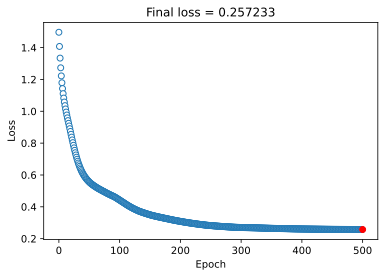

In [ ]:
# show the losses

# manually compute losses
# final forward pass
predictions = ANNreg(x)

# final loss (MSE)
testloss = (predictions-y).pow(2).mean()

plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.plot(numepochs,testloss.detach(),'ro')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Final loss = %g' %testloss.item())
plt.show()

In [ ]:
testloss

tensor(0.2572, grad_fn=<MeanBackward0>)

In [ ]:
testloss.detach()

tensor(0.2572)

In [ ]:
testloss.item()

0.2572328746318817

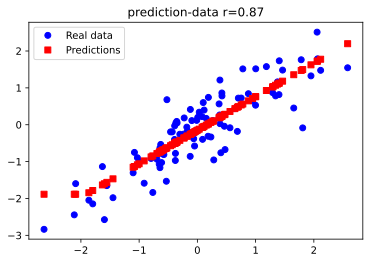

In [ ]:
# plot the data
plt.plot(x,y,'bo',label='Real data')
plt.plot(x,predictions.detach(),'rs',label='Predictions')
plt.title(f'prediction-data r={np.corrcoef(y.T,predictions.detach().T)[0,1]:.2f}')
plt.legend()
plt.show()

# Additional explorations

In [ ]:
# 1) How much data is "enough"? Try different values of N and see how low the loss gets. 
#    Do you still get low loss ("low" is subjective, but let's say loss<.25) with N=10? N=5?
# 
# 2) Does your conclusion above depend on the amount of noise in the data? Try changing the noise level
#    by changing the division ("/2") when creating y as x+randn.
# 
# 3) Notice that the model doesn't always work well. Put the original code (that is, N=30 and /2 noise)
#    into a function or a for-loop and repeat the training 100 times (each time using a fresh model instance).
#    Then count the number of times the model had a loss>.25.

In [22]:
import pandas as pd
from tqdm.notebook import tqdm

In [61]:
def train(m_list, num_experiments = 1, numepochs=200):
    
    N = 50
    x = torch.randn(N,1)
    experiments_list = []
    for experiment in tqdm(range(num_experiments)):
        model_losses = []
        for idx, m in enumerate(m_list):
            y = m * x + torch.randn(N,1)/2

            ANNreg = nn.Sequential(
            nn.Linear(1,1),  # input layer
            nn.ReLU(),       # activation function
            nn.Linear(1,1)   # output layer
            )
            learningRate = .05
            lossfun = nn.MSELoss()
            optimizer = torch.optim.SGD(ANNreg.parameters(),lr=learningRate)
            
            losses = torch.zeros(numepochs)
            for epochi in range(numepochs):
                # forward pass
                yHat = ANNreg(x)

                # compute loss
                loss = lossfun(yHat,y)
                losses[epochi] = loss

                # backprop
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
            # test
            predictions = ANNreg(x)
            testloss = (predictions-y).pow(2).mean()
            model_losses.append([m,testloss.item()])
        experiments_list.extend(model_losses)
            # print(f"model {num} has loss of {testloss.item()}")
    return experiments_list

In [62]:
experiments_list = train(m_list=m_list,num_experiments=50)
experiments_list

  0%|          | 0/50 [00:00<?, ?it/s]

[[-0.8229880268464482, 0.29535961151123047],
 [-0.014464973620066157, 0.1677027940750122],
 [0.07475640755773316, 0.22672374546527863],
 [0.6344691827437585, 0.6017996072769165],
 [-1.8906765072531293, 0.2820465862751007],
 [1.2406907248599395, 0.22453349828720093],
 [0.1989503362815479, 0.25744572281837463],
 [-1.4739197781783049, 0.24608542025089264],
 [1.519218857194852, 0.3754409849643707],
 [0.12203477172778854, 0.27594730257987976],
 [0.8414422598254467, 0.24163679778575897],
 [1.859966852226128, 0.2402963638305664],
 [-0.02112512697852198, 0.3987785279750824],
 [1.6467626505298032, 0.27030646800994873],
 [1.4678261569468831, 0.2299201339483261],
 [1.5748135310912605, 0.22908955812454224],
 [0.058269609156851754, 0.21118614077568054],
 [1.5054288482659506, 2.099677562713623],
 [-1.324069563766558, 0.25692638754844666],
 [-0.1575859936285453, 0.21781869232654572],
 [-1.5008782989619562, 2.199824333190918],
 [-0.8229880268464482, 0.26801609992980957],
 [-0.014464973620066157, 0.323

In [65]:
df = pd.DataFrame(experiments_list, columns=['slope','mse'])
df

,slope,mse
0,-0.822988,0.295360
1,-0.014465,0.167703
2,0.074756,0.226724
3,0.634469,0.601800
4,-1.890677,0.282047
...,...,...
1045,0.058270,0.281808
1046,1.505429,0.300650
1047,-1.324070,0.218288
1048,-0.157586,0.307031


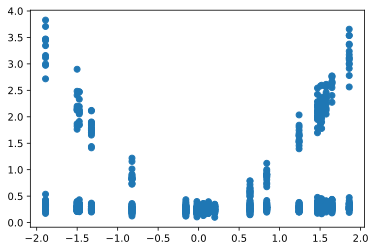

In [66]:
plt.plot(df['slope'],df['mse'],'o')

In [ ]:
plt.plot()

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MSE,100.0,0.478049,0.375862,0.243038,0.244061,0.256013,1.092907,1.092907
